In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('EnglandWeather.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83


### Нормализация

In [5]:
df["Summary"].drop_duplicates()

0                              Partly Cloudy
2                              Mostly Cloudy
46                                  Overcast
66                                     Foggy
80                  Breezy and Mostly Cloudy
223                                    Clear
1032                Breezy and Partly Cloudy
1306                     Breezy and Overcast
1334                 Humid and Mostly Cloudy
3903                 Humid and Partly Cloudy
4338                         Windy and Foggy
5183                      Windy and Overcast
5191                        Breezy and Foggy
5608                 Windy and Partly Cloudy
7180                                  Breezy
9157                   Dry and Partly Cloudy
11005                Windy and Mostly Cloudy
12181    Dangerously Windy and Partly Cloudy
12706                                    Dry
20930                                  Windy
36469                     Humid and Overcast
52689                             Light Rain
52690     

In [6]:
top_summary_values = df['Summary'].value_counts().nlargest(5).index.tolist()
filtered_df = df[df['Summary'].isin(top_summary_values)]
filtered_df

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


In [7]:
df = filtered_df.drop(['Formatted Date'], axis =1)
df = df.drop(['Precip Type'], axis =1)
df

,Summary,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,Partly Cloudy,9.472222,14.1197,1015.13,0.89
1,Partly Cloudy,9.355556,14.2646,1015.63,0.86
2,Mostly Cloudy,9.377778,3.9284,1015.94,0.89
3,Partly Cloudy,8.288889,14.1036,1016.41,0.83
4,Mostly Cloudy,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...
96448,Partly Cloudy,26.016667,10.9963,1014.36,0.43
96449,Partly Cloudy,24.583333,10.0947,1015.16,0.48
96450,Partly Cloudy,22.038889,8.9838,1015.66,0.56
96451,Partly Cloudy,21.522222,10.5294,1015.95,0.60


In [8]:
n_samples = int(len(df) * 0.9)
idx_to_remove = np.random.choice(df.index, size=n_samples, replace=False)
df= df.drop(idx_to_remove)
df

,Summary,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,Partly Cloudy,9.472222,14.1197,1015.13,0.89
22,Partly Cloudy,10.116667,6.6493,1015.40,0.79
48,Overcast,13.772222,17.0982,1007.36,0.60
59,Partly Cloudy,16.183333,0.6440,1005.97,0.73
60,Mostly Cloudy,17.516667,0.6762,1005.64,0.67
...,...,...,...,...,...
96377,Mostly Cloudy,18.805556,8.5813,1020.63,0.78
96397,Partly Cloudy,28.794444,7.4543,1019.55,0.41
96423,Partly Cloudy,27.800000,3.0751,1014.04,0.32
96429,Partly Cloudy,17.755556,2.9624,1014.65,0.81


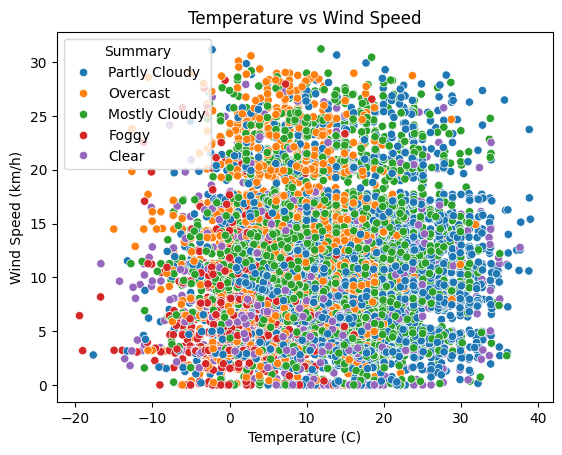

In [9]:
sns.scatterplot(data=df, x='Temperature (C)', y='Wind Speed (km/h)', hue='Summary')
plt.title('Temperature vs Wind Speed')
plt.show()

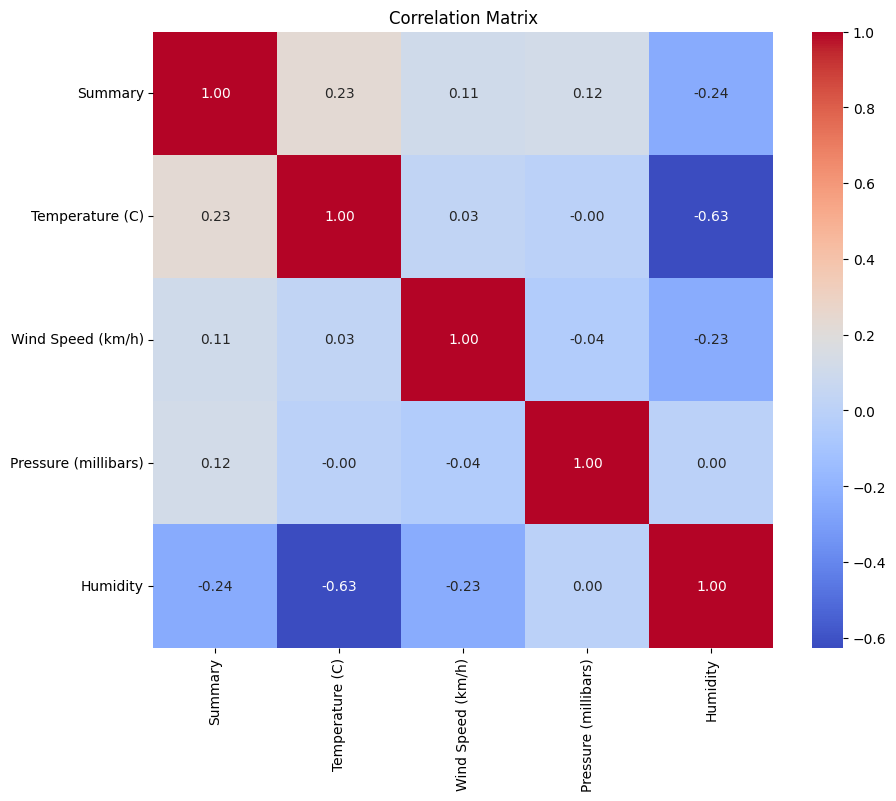

In [10]:
le = LabelEncoder()
df['Summary'] = le.fit_transform(df['Summary'])

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
scaler = MinMaxScaler()

for col in ["Temperature (C)","Wind Speed (km/h)", "Pressure (millibars)", "Humidity"]:
    df[col] = df[col].map(lambda x: x + 0.1)
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,Summary,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,4,0.494913,0.452062,0.970246,0.89
22,4,0.505943,0.212887,0.970504,0.79
48,3,0.568508,0.547423,0.962820,0.60
59,4,0.609775,0.020619,0.961491,0.73
60,2,0.632595,0.021649,0.961176,0.67


In [13]:
x = df.drop(['Summary'],axis=1)
y = df['Summary']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=549932)

### Проверка того, что мой knn вообще живой

In [23]:
def score(y, y_test):
    correct = 0
    for i in range(len(y)):
        if y[i] == y_test[i]:
            correct += 1
    return correct / len(y_test) * 100

In [17]:
library_predictions = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train).predict(x_test)
score(y_test.to_list(), library_predictions)

61.7989417989418

In [19]:
from knn import fit_knn, predict_knn, FIXED_WINDOW, VARIABLE_WINDOW, MANHATTAN_METRIC, EUCLIDEAN_METRIC, COSINE_METRIC

In [22]:
w = [1 for _ in range(len(x_train))]
window_param = 10
window_type = VARIABLE_WINDOW
kernel_type = "GAUSSIAN"
metric_type = EUCLIDEAN_METRIC

window_type, h, k, classes = fit_knn(y_train, window_param, window_type)
predictions = predict_knn(x_test, x_train, y_train, w, window_type, h, k, kernel_type, metric_type, classes)

score(y_test.to_list(), predictions)

62.11640211640212

### Гиперпараметры

In [243]:
import optuna

In [251]:
kr_map = {"uniform": "UNIFORM", "triangular": "TRIANGULAR", "epanechnikov": "EPANECHNIKOV",
          "gaussian": "GAUSSIAN"}
mt_map = {"manhattan": MANHATTAN_METRIC, "euclidean": EUCLIDEAN_METRIC, "cosine": COSINE_METRIC }


def my_objective(window_type, x_train, y_train, trial):
    w = [1 for _ in range(len(x_train))]
    if window_type == FIXED_WINDOW:
        window_param = trial.suggest_float("h", 0.01, 1)
    else:
        window_param = trial.suggest_int("k", 1, 100)
    kernel = trial.suggest_categorical("Kernel", ["uniform", "triangular", "epanechnikov", "gaussian"])
    metric = trial.suggest_categorical("Metric", ["manhattan", "euclidean", "cosine"])
    window_type, h, k, classes = fit_knn(y_train, window_param, window_type)
    predictions = predict_knn(x_test, x_train, y_train, w, window_type, h, k, kr_map[kernel], mt_map[metric], classes)

    return score(y_test.to_list(), predictions)


my_fixed = lambda trial: my_objective(FIXED_WINDOW, x_train, y_train, trial)
my_variable = lambda trial: my_objective(VARIABLE_WINDOW, x_train, y_train, trial)

study = optuna.create_study(direction="maximize")
study.optimize(my_fixed, n_trials=200)
best_fixed = study.best_trial

[I 2024-04-12 17:24:56,288] A new study created in memory with name: no-name-d1601a9c-0139-4676-845f-44b6e713e824
[I 2024-04-12 17:24:56,426] Trial 0 finished with value: 64.4973544973545 and parameters: {'h': 0.11685949097702847, 'Kernel': 'uniform', 'Metric': 'manhattan'}. Best is trial 0 with value: 64.4973544973545.
[I 2024-04-12 17:24:56,565] Trial 1 finished with value: 65.18518518518519 and parameters: {'h': 0.30630688674528894, 'Kernel': 'triangular', 'Metric': 'euclidean'}. Best is trial 1 with value: 65.18518518518519.
[I 2024-04-12 17:24:56,896] Trial 2 finished with value: 66.19047619047619 and parameters: {'h': 0.09688096295241516, 'Kernel': 'triangular', 'Metric': 'cosine'}. Best is trial 2 with value: 66.19047619047619.
[I 2024-04-12 17:24:57,041] Trial 3 finished with value: 65.13227513227514 and parameters: {'h': 0.35535587859381373, 'Kernel': 'gaussian', 'Metric': 'manhattan'}. Best is trial 2 with value: 66.19047619047619.
[I 2024-04-12 17:24:57,401] Trial 4 finished

In [252]:
study = optuna.create_study(direction="maximize")
study.optimize(my_variable, n_trials=200)
best_variable = study.best_trial

[I 2024-04-12 17:26:01,025] A new study created in memory with name: no-name-1e8d97c8-5735-4c10-b50f-cc05011f3cf1
[I 2024-04-12 17:26:01,088] Trial 0 finished with value: 56.71957671957672 and parameters: {'k': 4, 'Kernel': 'triangular', 'Metric': 'euclidean'}. Best is trial 0 with value: 56.71957671957672.
[I 2024-04-12 17:26:01,421] Trial 1 finished with value: 66.6137566137566 and parameters: {'k': 100, 'Kernel': 'triangular', 'Metric': 'cosine'}. Best is trial 1 with value: 66.6137566137566.
[I 2024-04-12 17:26:01,747] Trial 2 finished with value: 66.34920634920636 and parameters: {'k': 77, 'Kernel': 'triangular', 'Metric': 'cosine'}. Best is trial 1 with value: 66.6137566137566.
[I 2024-04-12 17:26:02,090] Trial 3 finished with value: 66.34920634920636 and parameters: {'k': 94, 'Kernel': 'epanechnikov', 'Metric': 'cosine'}. Best is trial 1 with value: 66.6137566137566.
[I 2024-04-12 17:26:02,385] Trial 4 finished with value: 65.55555555555556 and parameters: {'k': 85, 'Kernel': 'u

In [253]:
print("fixed window:", best_fixed.params)
print("variable window:", best_variable.params)

fixed window: {'h': 0.09688096295241516, 'Kernel': 'triangular', 'Metric': 'cosine'}
variable window: {'k': 97, 'Kernel': 'triangular', 'Metric': 'cosine'}


In [256]:
def sklearn_objective(x_train, y_train, trial):
    predictions = KNeighborsClassifier(
        trial.suggest_int("k", 1, 120),
        weights=trial.suggest_categorical("Weight", ["uniform", "distance"]),
        algorithm=trial.suggest_categorical("Algorithm", ["ball_tree", "kd_tree", "brute"])
    ).fit(x_train, y_train).predict(x_test)

    return score(y_test.to_list(), predictions)

my_fixed = lambda trial: sklearn_objective(x_train, y_train, trial)
my_variable = lambda trial: sklearn_objective(x_train, y_train, trial)

study = optuna.create_study(direction="maximize")
study.optimize(my_fixed, n_trials=100)
best_fixed = study.best_trial

[I 2024-04-12 17:27:41,639] A new study created in memory with name: no-name-346b9260-3e87-4a15-a1d4-e63fe1139471
[I 2024-04-12 17:27:41,718] Trial 0 finished with value: 65.07936507936509 and parameters: {'k': 31, 'Weight': 'uniform', 'Algorithm': 'ball_tree'}. Best is trial 0 with value: 65.07936507936509.
[I 2024-04-12 17:27:41,805] Trial 1 finished with value: 65.76719576719577 and parameters: {'k': 57, 'Weight': 'uniform', 'Algorithm': 'ball_tree'}. Best is trial 1 with value: 65.76719576719577.
[I 2024-04-12 17:27:41,905] Trial 2 finished with value: 65.13227513227514 and parameters: {'k': 83, 'Weight': 'uniform', 'Algorithm': 'ball_tree'}. Best is trial 1 with value: 65.76719576719577.
[I 2024-04-12 17:27:41,982] Trial 3 finished with value: 64.70899470899471 and parameters: {'k': 104, 'Weight': 'uniform', 'Algorithm': 'brute'}. Best is trial 1 with value: 65.76719576719577.
[I 2024-04-12 17:27:42,046] Trial 4 finished with value: 65.44973544973544 and parameters: {'k': 82, 'Wei

In [257]:
print("lib", study.best_trial.params)

lib {'k': 69, 'Weight': 'distance', 'Algorithm': 'kd_tree'}


### Сравнение

In [258]:
def my_score(k, x_train, y_train):
    w = [1 for _ in range(len(x_train))]
    window_type, h, k, classes = fit_knn(y_train, k, VARIABLE_WINDOW)
    predictions = predict_knn(x_test, x_train, y_train, w, window_type, h, k, "EPANECHNIKOV", MANHATTAN_METRIC, classes)

    return score(y_test.to_list(), predictions)

def lib_score(k, x_train, y_train):
    predictions = KNeighborsClassifier(
        k,
        weights="distance",
        algorithm="brute",
    ).fit(x_train, y_train).predict(x_test)

    return score(y_test.to_list(), predictions)

In [259]:
xs = [x for x in range(1, 200)]
ys_train, ys_lib_train = [], []
for k in xs:
    ys_train.append(my_score(k, x_train, y_train))
    ys_lib_train.append(lib_score(k, x_train, y_train))
    print("appended", k)

appended 1
appended 2
appended 3
appended 4
appended 5
appended 6
appended 7
appended 8
appended 9
appended 10
appended 11
appended 12
appended 13
appended 14
appended 15
appended 16
appended 17
appended 18
appended 19
appended 20
appended 21
appended 22
appended 23
appended 24
appended 25
appended 26
appended 27
appended 28
appended 29
appended 30
appended 31
appended 32
appended 33
appended 34
appended 35
appended 36
appended 37
appended 38
appended 39
appended 40
appended 41
appended 42
appended 43
appended 44
appended 45
appended 46
appended 47
appended 48
appended 49
appended 50
appended 51
appended 52
appended 53
appended 54
appended 55
appended 56
appended 57
appended 58
appended 59
appended 60
appended 61
appended 62
appended 63
appended 64
appended 65
appended 66
appended 67
appended 68
appended 69
appended 70
appended 71
appended 72
appended 73
appended 74
appended 75
appended 76
appended 77
appended 78
appended 79
appended 80
appended 81
appended 82
appended 83
appended 84
a

Text(0, 0.5, 'Accuracy')

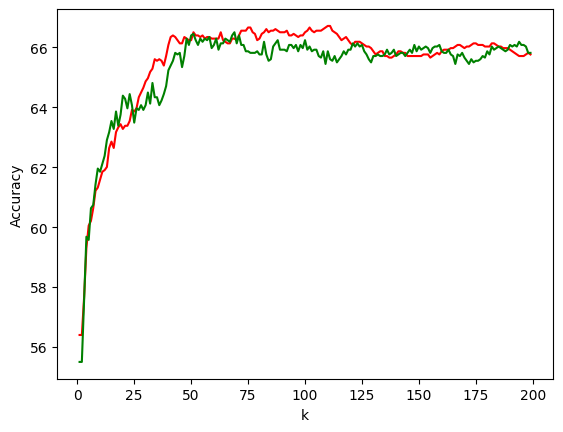

In [260]:
plt.plot(xs, ys_train, color='red')
plt.plot(xs, ys_lib_train, color='green')
plt.xlabel('k')
plt.ylabel('Accuracy')

### Аномалии

In [261]:
ok, type1, type2 = [], [], []
no = 0

for i in x_train.index:
    w = [1 for _ in range(len(x_train))]
    window_type, h, k, classes = fit_knn(y_train, 69, VARIABLE_WINDOW)
    predictions = predict_knn(x_test, x_train, y_train, w, window_type, h, 69, "EPANECHNIKOV", MANHATTAN_METRIC, classes)[0]
    no += 1
    if y_train.loc[i] == predictions:
        ok.append(no - 1)
    elif abs(y_train.loc[i] - predictions) == 1:
        type1.append(no - 1)
    else:
        type2.append(no - 1)
    print(no, "done")

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123 done
1

In [265]:
print("Accuracy", len(ok) / no * 100)
print("Anomalies 1:", len(type1))
print("Anomalies 2:", len(type2))

Accuracy 52.84372105332804
Anomalies 1: 1374
Anomalies 2: 3701


Text(0, 0.5, 'Accuracy')

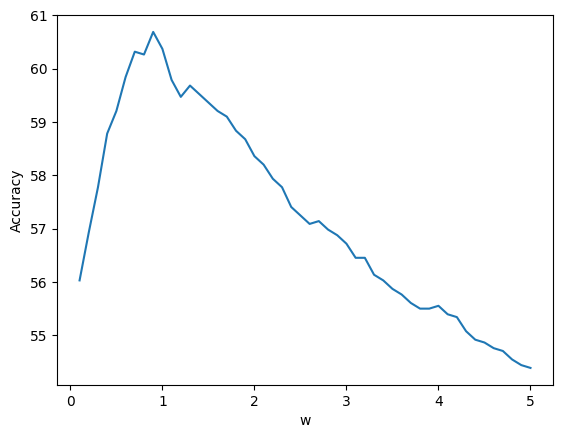

In [266]:
def set_weights(weights):
    new_weights = []
    for i in range(len(x_train)):
        if i in type1:
            new_weights.append(weights)
        elif i in type2:
            new_weights.append(0)
        else:
            new_weights.append(1)
    return new_weights


def get_accuracy(w, x_train, y_train, x_test, y):
    window_type, h, k, classes = fit_knn(y_train, 100, VARIABLE_WINDOW)
    predictions = predict_knn(x_test, x_train, y_train, set_weights(w), window_type, h, 100, "EPANECHNIKOV", MANHATTAN_METRIC, classes)
    y_test_list = y.to_list()
    correct = 0
    for i in range(len(y_test_list)):
        if y_test_list[i] == predictions[i]:
            correct += 1
    accuracy = correct / len(y_test_list) * 100
    return accuracy


xs = [x / 10 for x in range(1, 51)]
ys = [get_accuracy(w, x_train, y_train, x_test, y_test) for w in xs]
plt.plot(xs, ys)
plt.xlabel('w')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

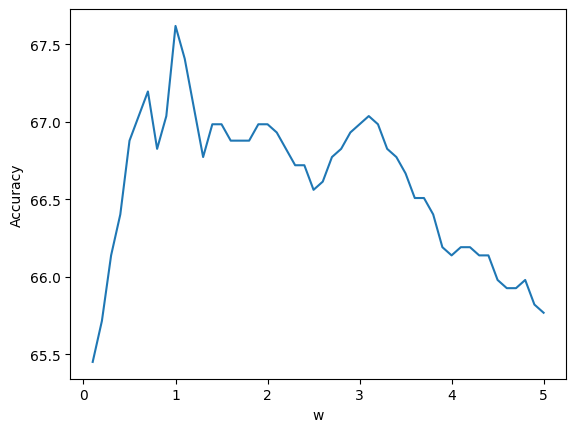

In [267]:
ys = [get_accuracy(w, x_test, y_test, x_test, y_test) for w in xs]
plt.plot(xs, ys)
plt.xlabel('w')
plt.ylabel('Accuracy')